Vorbereitung:

In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time
import pandas as pd

saving_plots = False

Daten einlesen:

In [2]:
name = 'props_t id=1211'
propst = np.load('saved_data/' + name +'.npy')
tend = len(propst)
time = range(0, tend)
maxlab = len(propst[0]['num_off'])-1

print('maxlab ist ', maxlab)
print('Zeitschritte bis Homogenität ', tend-1)

maxlab ist  66
Zeitschritte bis Homogenität  1416


Entropien vergleichen:

<IPython.core.display.Javascript object>


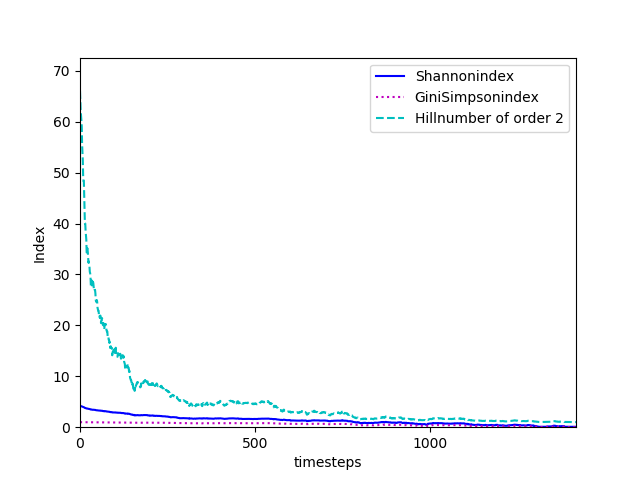

<IPython.core.display.Javascript object>


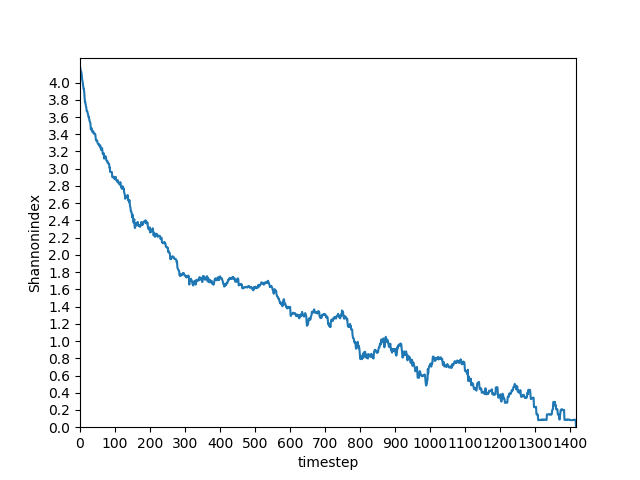

(array([4.18965474, 4.15888308, 4.13722223, ..., 0.0859155 , 0.08256494,
        0.        ]), 4.189654742026425)

In [4]:
%matplotlib notebook
plot_sh_gi_hh(propst, save=saving_plots, id=name)
entropies(propst, order=1, plot=True)

Entwicklung Populationsgröße:

<IPython.core.display.Javascript object>


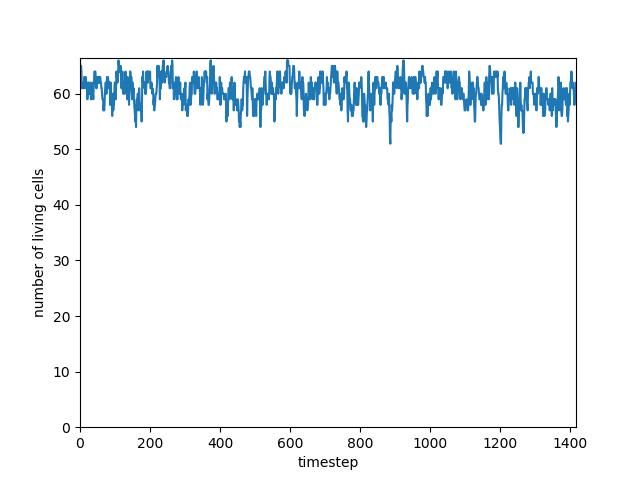

In [13]:
%matplotlib notebook
plot_popsize(propst, save=saving_plots, id=name)

Mullerplot erstellen:

<IPython.core.display.Javascript object>


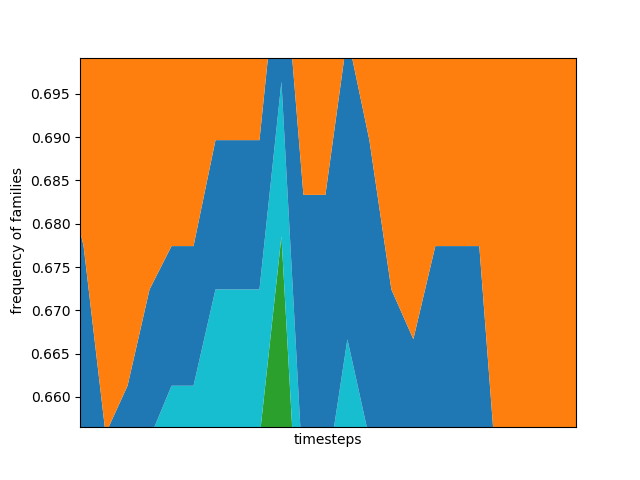

In [5]:
%matplotlib notebook
mullerplot(propst, save=saving_plots, id=name)